### Introduction

Buildings use 40% of the world's energy, making them crucial for energy efficiency improvements. Addressing heating and cooling needs throughout a building's lifecycle, including operation and design stages, can lead to energy savings, lower operational costs, and reduced environmental impact.


### Problem Statement and Objectives

The goal of this project is to create a predictive model that can accurately forecast the heating and cooling load requirements for building energy efficiency.

With a growing emphasis on sustainable and energy-efficient building designs, it is vital to understand and estimate heating and cooling energy requirements.

This work intends to forecast these loads using multiple machine learning models and building energy performance data, which can help to optimize energy usage, reduce expenses, and minimize environmental effect.

The purpose of this study is to use several models and building energy performance data to anticipate how much heating and cooling will be required for building efficiency.














In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data Description



The dataset includes the following variables about building design and energy use:

- **Relative Compactness**: Determines how compact the building shape is.

- **Surface Area (m²)**: The whole outside area of the building.

- **Wall Area (m²)** refers to the total area of the building's walls.

- **Roof Area (m²)**: The size of the building's roof.

- **Overall Height (m)**: The height of the building.

- **Orientation**: The direction the building faces (2: north, 3: east, 4: south, 5: west).

- **Glazing Area (% of floor area)**: The proportion of the floor area covered by windows (0%, 10%, 25%, 40%).

- **Glazing Area Distribution**: How windows are distributed (1: uniform, 2: north, 3: east, 4: south, and 5: west).

- **Heating Load (kWh)**: The energy required to heat the building.

- **Cooling Load (kWh)**: The energy required to cool the building.

The features allow us to understand how building design influences the amount of energy required for heating and cooling.



### Importation of Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
ls

drive/  sample_data/


In [ ]:
# Loading dataset
energy_df = pd.read_csv('/content/drive/MyDrive/GIZ Fellowship Files/Machine learning group work/Building Energy Efficiency.csv')

### Data Cleaning & Validation

In [ ]:
energy_df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.7638,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.9800,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.9800,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.9800,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.9000,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
energy_df.shape

(768, 10)

In [ ]:
energy_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative Compactness,768.0,0.763885,0.105490,0.62,0.6825,0.75,0.8200,0.98
Surface Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing Area Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating Load,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Cooling Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


In [ ]:
energy_df.isna().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [ ]:
energy_df.duplicated().sum()

0

 There are no missing values and outliers in the data set

In [ ]:
energy_df.value_counts()

Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  Orientation  Glazing Area  Glazing Area Distribution  Heating Load  Cooling Load
0.62                  808.5         367.5      220.50     3.5             2            0.00          0                          8.60          12.07           1
                                                                                       0.10          1                          12.96         14.34           1
0.79                  637.0         343.0      147.00     7.0             5            0.25          4                          40.12         37.26           1
                                                                                                     5                          38.65         43.73           1
                                                                                       0.40          1                          41.67         46.94           1
                                             

In [ ]:
energy_df.nunique()

Relative Compactness          13
Surface Area                  12
Wall Area                      7
Roof Area                      4
Overall Height                 2
Orientation                    4
Glazing Area                   4
Glazing Area Distribution      6
Heating Load                 586
Cooling Load                 636
dtype: int64

### Exploratory Data Analysis

#### Univariate Analysis

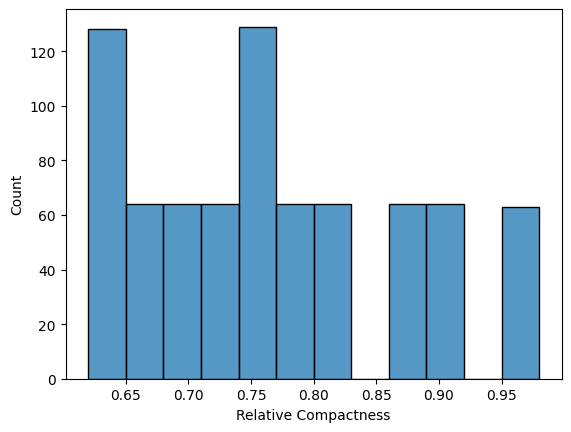

In [ ]:
sns.histplot(x='Relative Compactness', data=energy_df)
plt.show()

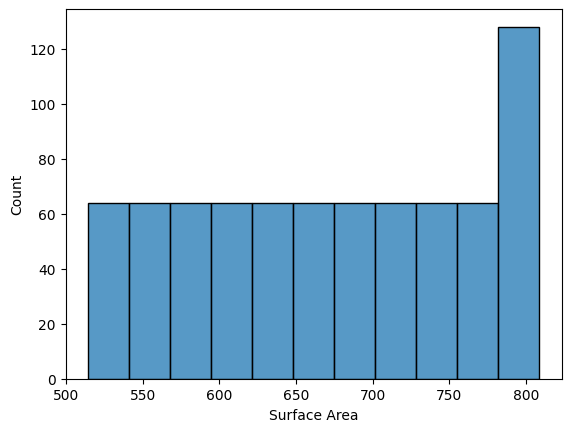

In [ ]:
sns.histplot(x='Surface Area', data=energy_df)
plt.show()

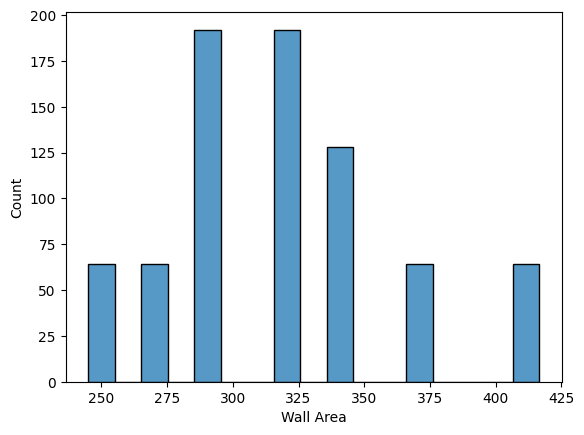

In [ ]:
sns.histplot(x='Wall Area', data=energy_df)
plt.show()

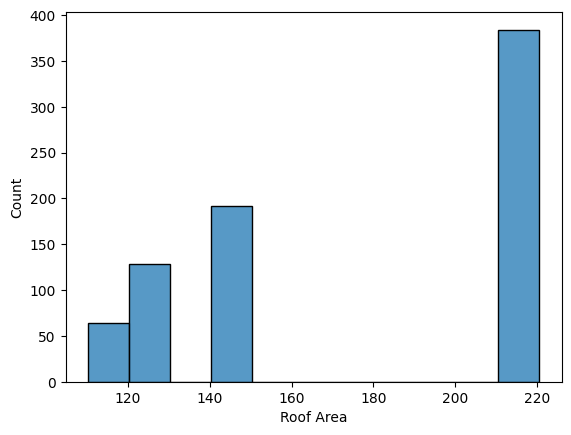

In [ ]:
sns.histplot(x='Roof Area', data=energy_df)
plt.show()

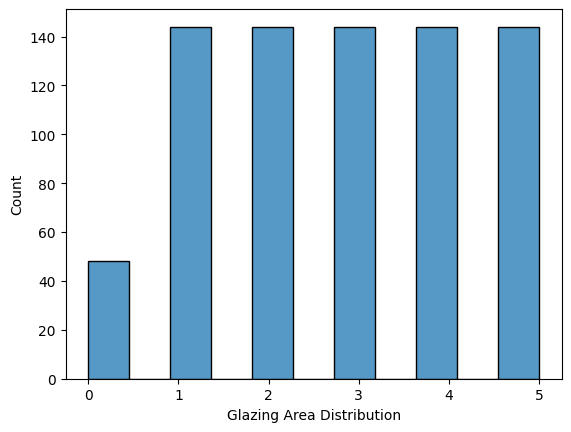

In [ ]:
sns.histplot(x='Glazing Area Distribution', data=energy_df)
plt.show()

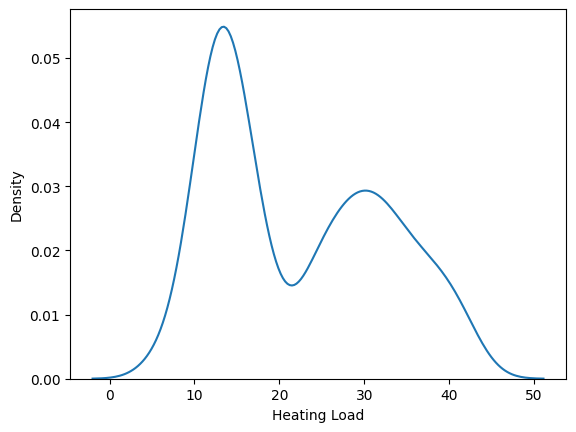

In [ ]:
sns.kdeplot(x='Heating Load', data=energy_df)
plt.show()

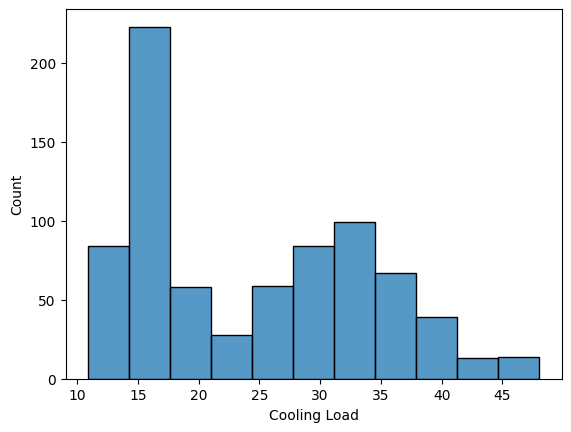

In [ ]:
sns.histplot(x='Cooling Load', data=energy_df)
plt.show()

#### Bivariate Analysis

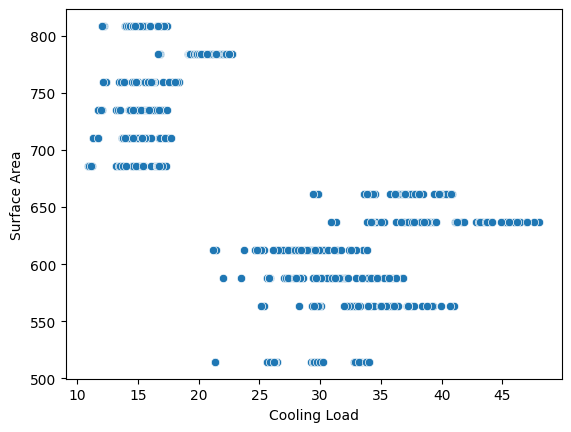

In [ ]:
sns.scatterplot(x= 'Cooling Load', y='Surface Area', data = energy_df)
plt.show()

In [ ]:
energy_df.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

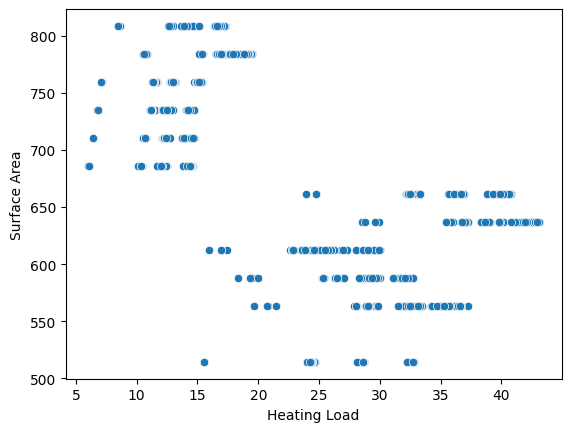

In [ ]:
sns.scatterplot(x= 'Heating Load', y='Surface Area', data = energy_df)
plt.show()

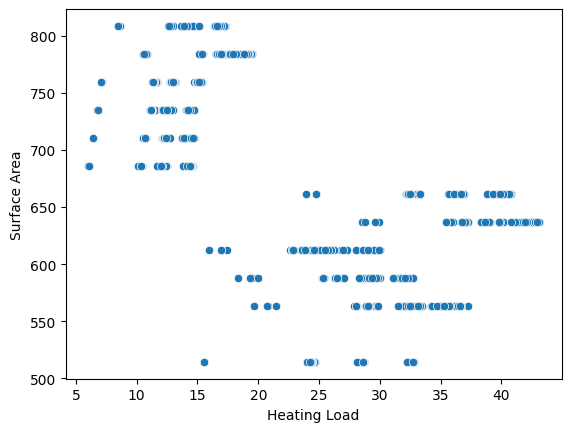

In [ ]:
sns.scatterplot(x= 'Heating Load', y='Surface Area', data = energy_df)
plt.show()

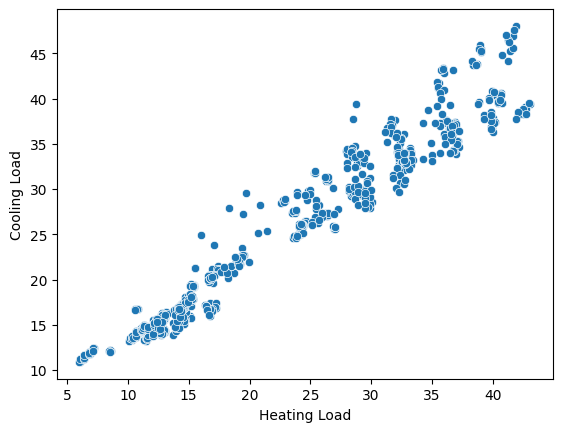

In [ ]:
sns.scatterplot(x= 'Heating Load', y='Cooling Load', data = energy_df)
plt.show()

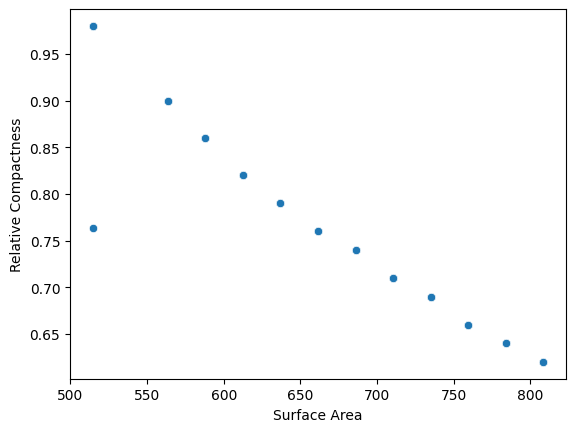

In [ ]:
sns.scatterplot(x='Surface Area', y='Relative Compactness', data= energy_df)

plt.show()

#### Multi-variate Analysis

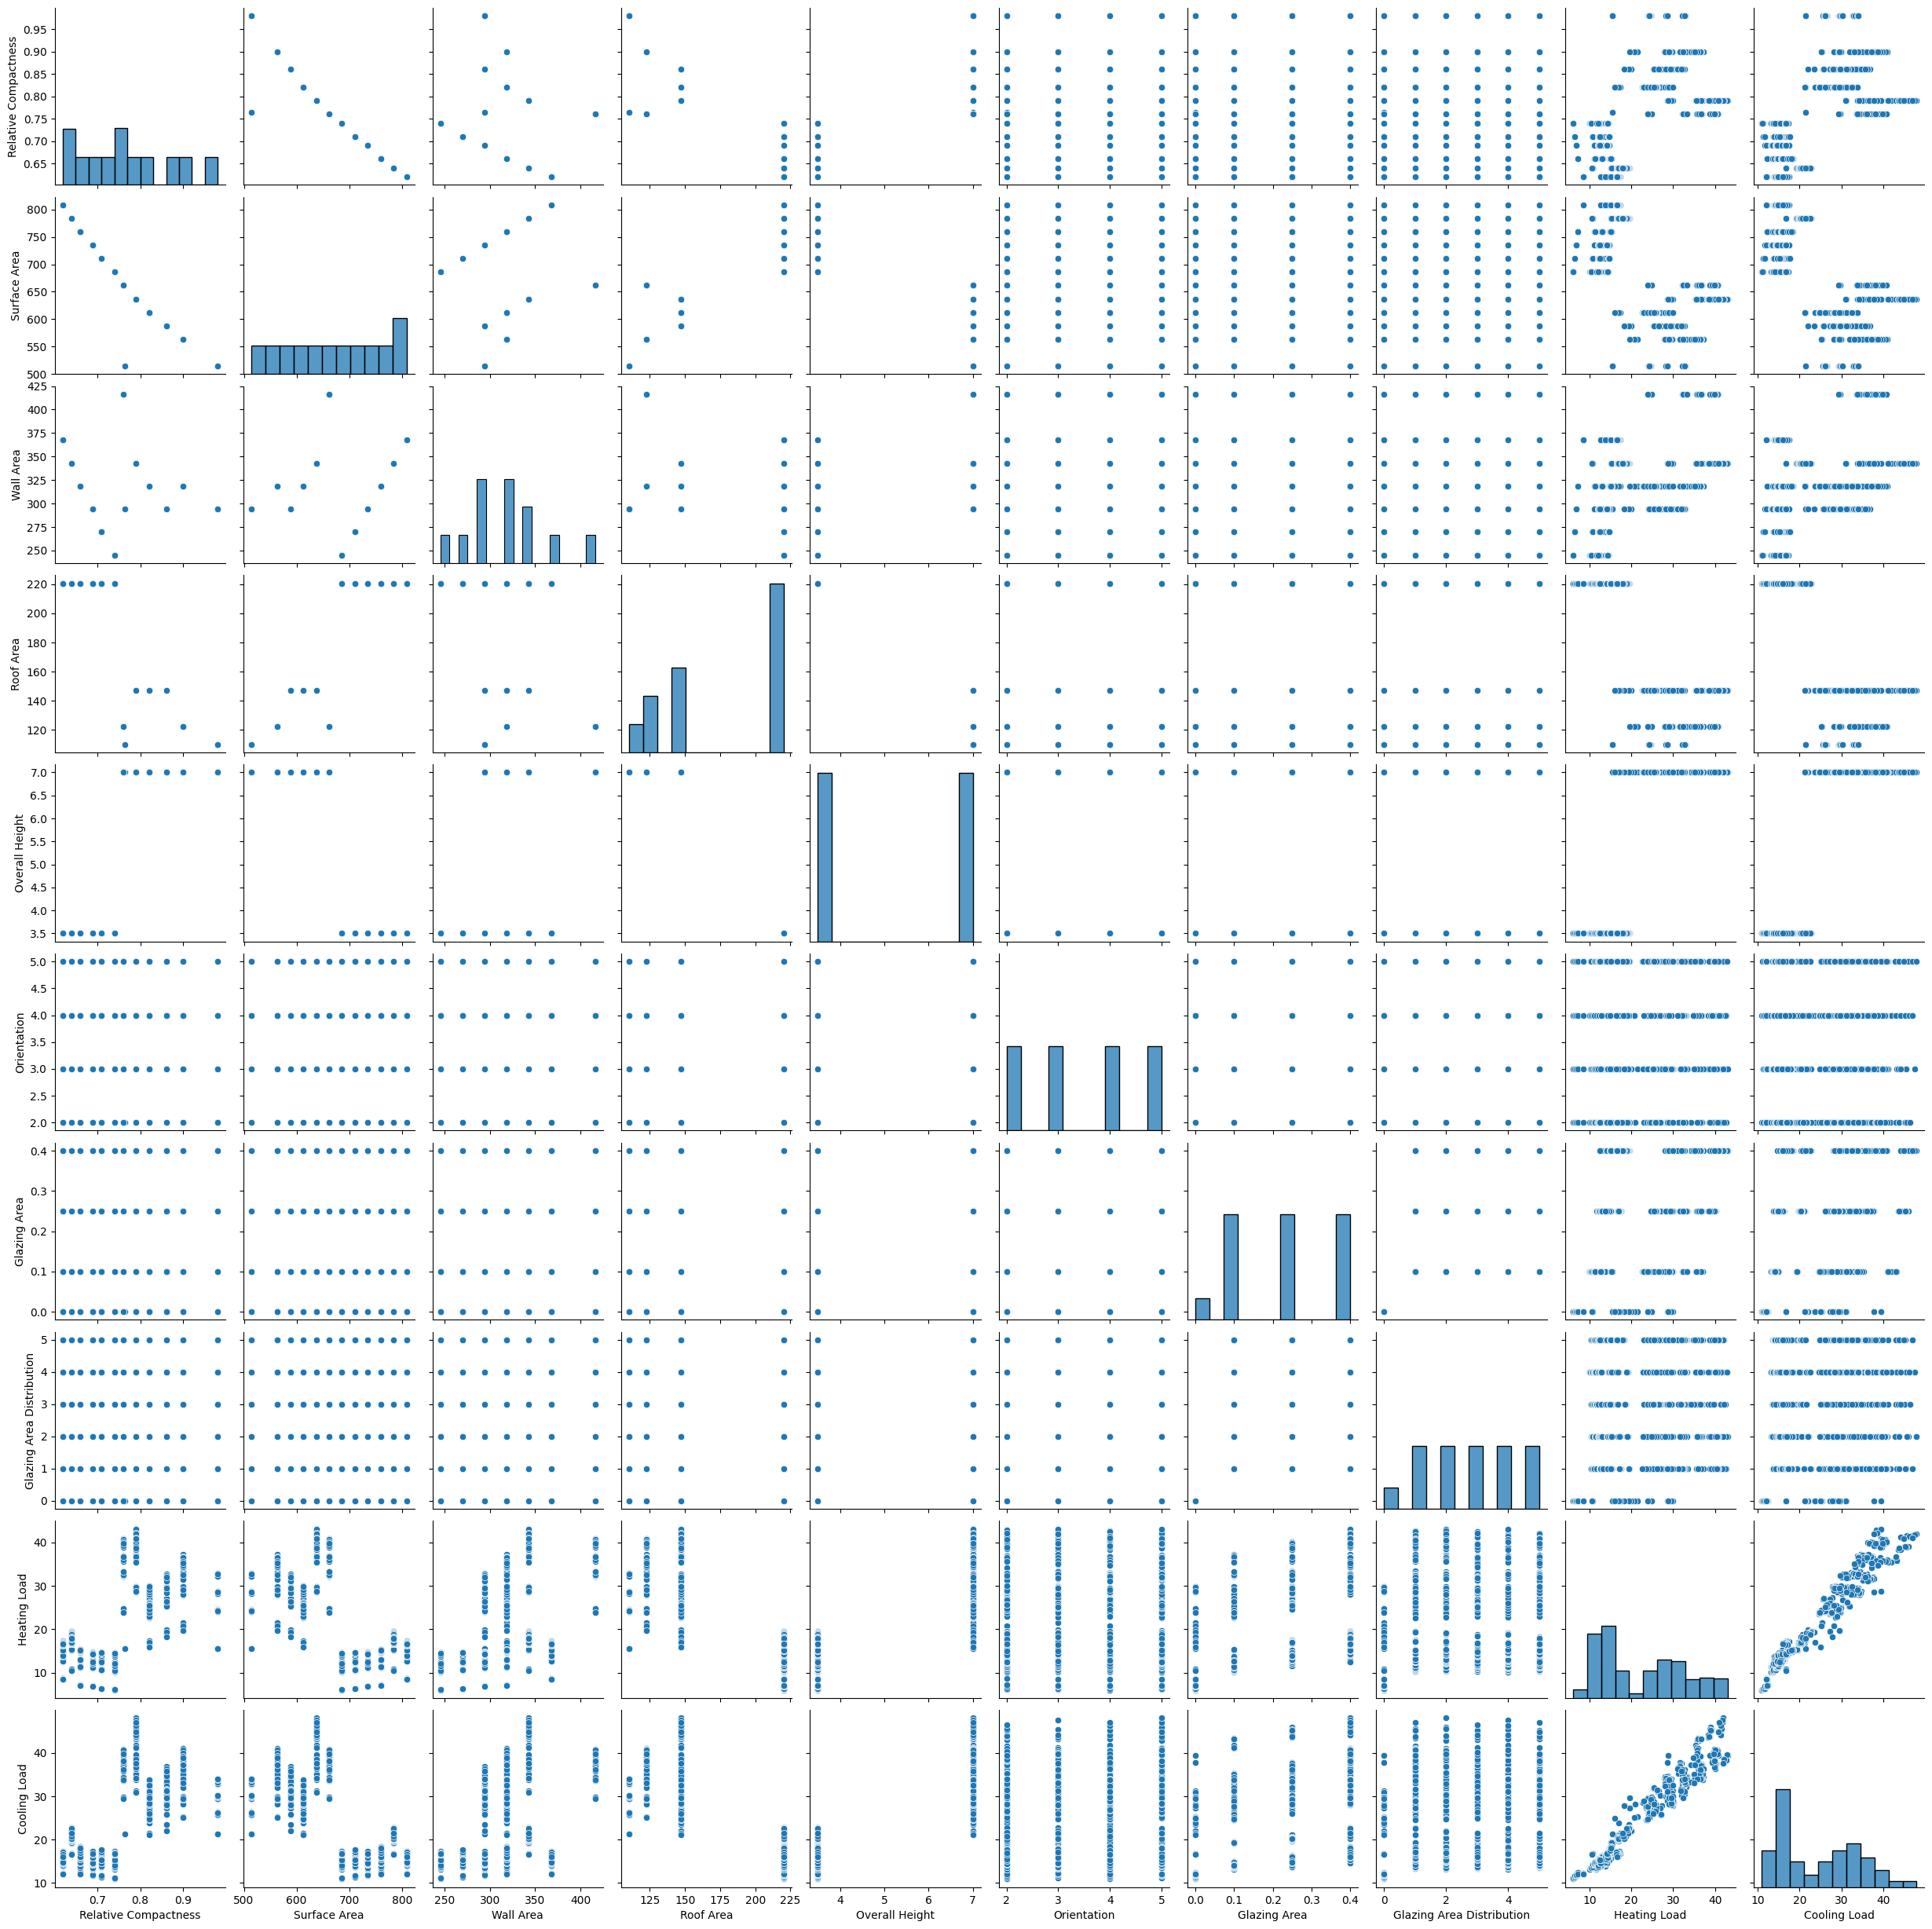

In [ ]:
sns.pairplot(data = energy_df)
plt.show()

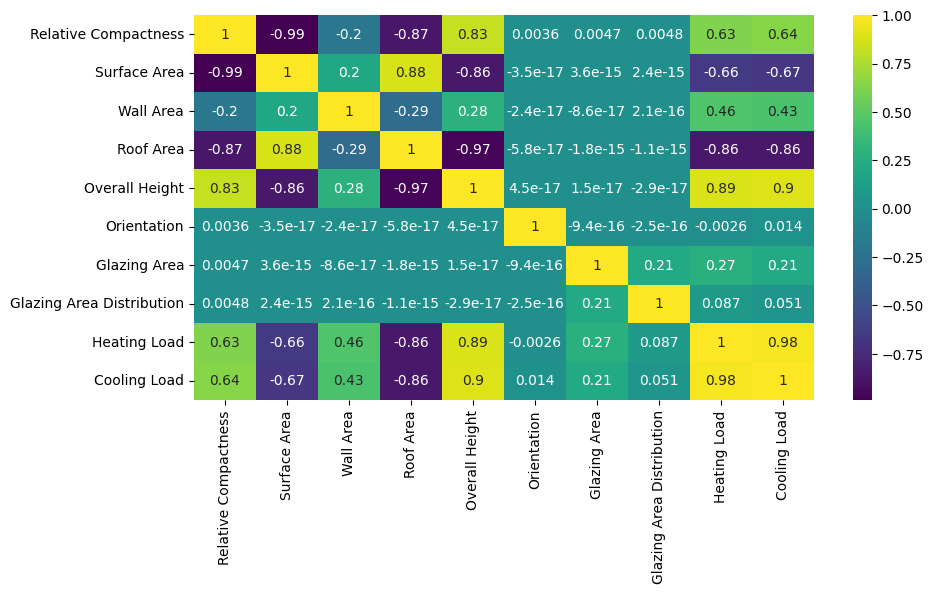

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(energy_df.corr(), annot= True,cmap='viridis')
plt.show()

### Data Pre-Processing

In [ ]:
#Splitting data into feature and target variable
X= energy_df.drop(columns=['Cooling Load','Heating Load'])
y1=energy_df['Cooling Load']
y2= energy_df['Heating Load']
y= energy_df[['Cooling Load', 'Heating Load']]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.25, random_state = 42)
print(X_train, '\n' ,  X_test, '\n',y1_train, '\n', y1_test, '\n', y2_train, '\n',y2_test)

     Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
357                  0.76         661.5      416.5     122.50             7.0   
73                   0.74         686.0      245.0     220.50             3.5   
352                  0.79         637.0      343.0     147.00             7.0   
497                  0.79         637.0      343.0     147.00             7.0   
145                  0.98         514.5      294.0     110.25             7.0   
..                    ...           ...        ...        ...             ...   
71                   0.76         661.5      416.5     122.50             7.0   
106                  0.86         588.0      294.0     147.00             7.0   
270                  0.71         710.5      269.5     220.50             3.5   
435                  0.98         514.5      294.0     110.25             7.0   
102                  0.90         563.5      318.5     122.50             7.0   

     Orientation  Glazing A

### Model Building

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE

SVR before hyperparameter tuning

In [ ]:
svr1 = SVR()
svr1.fit(X_train, y1_train)
print("Train set score for y1: {:.2f} ".format(svr1.score(X_train, y1_train)))
print("Test set score for y1: {:.2f} ".format(svr1.score(X_test, y1_test)))

Train set score for y1: 0.70 
Test set score for y1: 0.68 


In [ ]:
svr2 = SVR()
svr2.fit(X_train, y2_train)
print("Train set score for y2: {:.2f} ".format(svr2.score(X_train, y2_train)))
print("Test set score for y2: {:.2f} ".format(svr2.score(X_test, y2_test)))

Train set score for y2: 0.69 
Test set score for y2: 0.69 


Hyperparameter Tuning for SVR, y1 and y2

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
svr1_grid = GridSearchCV(SVR(), param_grid, cv=5)

svr1_grid .fit(X_train, y1_train)
print("Test set score for y1: {:.2f} ".format(svr1_grid.score(X_test, y1_test)))
print("Best parameters for y1: {} ".format(svr1_grid.best_params_))
print("Best cross-validation score for y1: {:.2f} ".format(svr1_grid.best_score_))
print("Best estimator for y1:\n{} ".format(svr1_grid.best_estimator_))

Test set score for y1: 0.98 
Best parameters for y1: {'C': 100, 'gamma': 0.1} 
Best cross-validation score for y1: 0.98 
Best estimator for y1:
SVR(C=100, gamma=0.1) 


In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
svr2_grid  = GridSearchCV(SVR(), param_grid, cv=5)

svr2_grid.fit(X_train, y2_train)
print("Test set score for target 2: {:.2f}".format(svr2_grid.score(X_test, y2_test)))
print("Best parameters for target 2: {}".format(svr2_grid.best_params_))
print("Best cross-validation score for target 2: {:.2f}".format(svr2_grid.best_score_))
print("Best estimator for target 2:\n{} ".format(svr2_grid.best_estimator_))

Test set score for target 2: 0.99
Best parameters for target 2: {'C': 100, 'gamma': 0.1}
Best cross-validation score for target 2: 0.99
Best estimator for target 2:
SVR(C=100, gamma=0.1) 


SVR after hyperparameter tuning

In [ ]:
svr1 = SVR(C=100,gamma=0.1)
svr1.fit(X_train, y1_train)
print("Train set score for y1: {:.2f} ".format(svr1.score(X_train, y1_train)))
print("Test set score for y1: {:.2f} ".format(svr1.score(X_test, y1_test)))

Train set score for y1: 0.99 
Test set score for y1: 0.98 


In [ ]:
svr2 = SVR(C=100, gamma=0.1)
svr2.fit(X_train, y2_train)
print("Train set score for y2: {:.2f} ".format(svr2.score(X_train, y2_train)))
print("Test set score for y2: {:.2f} ".format(svr2.score(X_test, y2_test)))

Train set score for y2: 1.00 
Test set score for y2: 0.99 


Lasso Regression before Hyperparameter tuning

In [ ]:
lasso1 = Lasso()
lasso1.fit(X_train, y1_train)
print("Train set score for y1: {:.2f}".format(lasso1.score(X_train, y1_train)))
print("Test set score for y1: {:.2f}".format(lasso1.score(X_test, y1_test)))

Train set score for y1: 0.78
Test set score for y1: 0.77


In [ ]:
lasso2 = Lasso()
lasso2.fit(X_train, y2_train)
print("Train set score for y2: {:.2f}".format(lasso2.score(X_train,y2_train)))
print("Test set score for y2: {:.2f}".format(lasso2.score(X_test, y2_test)))

Train set score for y2: 0.79
Test set score for y2: 0.79


Hyperparameter tuning for Lasso

In [ ]:
param_grid = {'alpha': [0.1, 1, 10, 100]}
lasso_grid1 = GridSearchCV(lasso1, param_grid, cv=5)

lasso_grid1.fit(X_train, y1_train)
print("Test set score for y1: {:.2f}".format(lasso_grid1.score(X_test, y1_test)))
print("Best parameters for y1: {}".format(lasso_grid1.best_params_))
print("Best cross-validation score for y1: {:.2f}".format(lasso_grid1.best_score_))
print("Best estimator for y1:\n{} ".format(lasso_grid1.best_estimator_))

Test set score for y1: 0.88
Best parameters for y1: {'alpha': 0.1}
Best cross-validation score for y1: 0.87
Best estimator for y1:
Lasso(alpha=0.1) 


In [ ]:
param_grid = {'alpha': [ 0.1, 1, 10, 100]}
lasso_grid2 = GridSearchCV(lasso2, param_grid, cv=5)

lasso_grid2.fit(X_train, y2_train)
print("Test set score for y2: {:.2f}".format(lasso_grid2.score(X_test, y2_test)))
print("Best parameters for y2: {}".format(lasso_grid2.best_params_))
print("Best cross-validation score for y2: {:.2f}".format(lasso_grid2.best_score_))
print("Best estimator for y2:\n{} ".format(lasso_grid2.best_estimator_))

Test set score for y2: 0.90
Best parameters for y2: {'alpha': 0.1}
Best cross-validation score for y2: 0.90
Best estimator for y2:
Lasso(alpha=0.1) 


Lasso after hyperparameter tuning

In [ ]:
lasso1 = Lasso(alpha=0.1)
lasso1.fit(X_train, y1_train)
print("Train set score for target 1: {:.2f}".format(lasso1.score(X_train, y1_train)))
print("Test set score for target 1: {:.2f}".format(lasso1.score(X_test, y1_test)))

Train set score for target 1: 0.87
Test set score for target 1: 0.88


In [ ]:
lasso2 = Lasso(alpha=0.1)
lasso2.fit(X_train, y2_train)
print("Train set score for target 2: {:.2f}".format(lasso2.score(X_train,y2_train)))
print("Test set score for target 2: {:.2f}".format(lasso2.score(X_test, y2_test)))

Train set score for target 2: 0.91
Test set score for target 2: 0.90


Ridge Regression before hyperparameter tuning


In [ ]:
ridge1 = Ridge()
ridge1.fit(X_train, y1_train,y2_train)
print("Train set score for y1: {:.2f}".format(ridge1.score(X_train, y1_train)))
print("Test set score for y1: {:.2f}".format(ridge1.score(X_test, y1_test)))

Train set score for y1: 0.88
Test set score for y1: 0.89


In [ ]:
ridge2 = Ridge()
ridge2.fit(X_train, y2_train)
print("Train set score for y2: {:.2f}".format(ridge2.score(X_train, y2_train)))
print("Test set score for y2: {:.2f}".format(ridge2.score(X_test, y2_test)))

Train set score for y2: 0.91
Test set score for y2: 0.91


Hyperparameter tuning for ridge

In [ ]:
param_grid = {'alpha': [0.1, 1, 10, 100]}
ridge1_grid = GridSearchCV(ridge1, param_grid, cv=5)

ridge1_grid.fit(X_train, y1_train)
print("Test set score for target 1: {:.2f}".format(ridge1_grid.score(X_test, y1_test)))
print("Best parameters for target 1: {}".format(ridge1_grid.best_params_))
print("Best cross-validation score for target 1: {:.2f}".format(ridge1_grid.best_score_))
print("Best estimator for target 1:\n{} ".format(ridge1_grid.best_estimator_))

Test set score for target 1: 0.89
Best parameters for target 1: {'alpha': 0.1}
Best cross-validation score for target 1: 0.88
Best estimator for target 1:
Ridge(alpha=0.1) 


In [ ]:
param_grid = {'alpha': [ 0.1, 1, 10, 100]}
ridge2_grid = GridSearchCV(ridge2, param_grid, cv=5)

ridge2_grid.fit(X_train, y2_train)
print("Test set score for target 2: {:.2f}".format(ridge2_grid.score(X_test, y2_test)))
print("Best parameters for target 2: {}".format(ridge2_grid.best_params_))
print("Best cross-validation score for target 2: {:.2f}".format(ridge2_grid.best_score_))
print("Best estimator for target 2:\n{} ".format(ridge2_grid.best_estimator_))

Test set score for target 2: 0.91
Best parameters for target 2: {'alpha': 0.1}
Best cross-validation score for target 2: 0.91
Best estimator for target 2:
Ridge(alpha=0.1) 


Ridge regression after hyperparameter tuning

In [ ]:
ridge1 = Ridge(alpha=0.1)
ridge1.fit(X_train, y1_train,y2_train)
print("Train set score for y1: {:.2f}".format(ridge1.score(X_train, y1_train)))
print("Test set score for y1: {:.2f}".format(ridge1.score(X_test, y1_test)))

Train set score for y1: 0.88
Test set score for y1: 0.89


In [ ]:
ridge2 = Ridge(alpha=0.1)
ridge2.fit(X_train, y2_train)
print("Train set score for y2: {:.2f}".format(ridge2.score(X_train, y2_train)))
print("Test set score for y2: {:.2f}".format(ridge2.score(X_test, y2_test)))

Train set score for y2: 0.91
Test set score for y2: 0.91


**KNeigbors Regression** before hyperparameter tuning

In [ ]:
knr1 = KNeighborsRegressor()
new_var = knr1.fit(X_train, y1_train)
print('Train set score for y1 is {:.2f}'.format(knr1.score(X_train, y1_train)))
print('Test set score for y1 is {:.2f}'.format(knr1.score(X_test, y1_test)))

print()

knr2 = KNeighborsRegressor()
new_var = knr2.fit(X_train, y2_train)
print('The train set score for y2 is {:.2f}'.format(knr2.score(X_train, y2_train)))
print('The test set score for y2 is {:.2f}'.format(knr2.score(X_test, y2_test)))

Train set score for y1 is 0.97
Test set score for y1 is 0.95

The train set score for y2 is 0.97
The test set score for y2 is 0.95


Hyperparameter tuning for KNeighborsRegressor

In [ ]:
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
knr1_grid = GridSearchCV(knr1, param_grid, cv=5)

knr1_grid.fit(X_train, y1_train)
print("Test set score for y1: {:.2f}".format(knr1_grid.score(X_test, y1_test)))
print("Best parameters for y1: {}".format(knr1_grid.best_params_))
print("Best cross-validation score for y1: {:.2f}".format(knr1_grid.best_score_))
print("Best estimator for y1:\n{} ".format(knr1_grid.best_estimator_))

Test set score for y1: 0.95
Best parameters for y1: {'n_neighbors': 3}
Best cross-validation score for y1: 0.95
Best estimator for y1:
KNeighborsRegressor(n_neighbors=3) 


In [ ]:
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
knr2_grid = GridSearchCV(knr2, param_grid, cv=5)

knr2_grid.fit(X_train, y2_train)
print("Test set score for y2: {:.2f}".format(knr2_grid.score(X_test, y2_test)))
print("Best parameters for y2: {}".format(knr2_grid.best_params_))
print("Best cross-validation score for y2: {:.2f}".format(knr2_grid.best_score_))
print("Best estimator for y2:\n{} ".format(knr2_grid.best_estimator_))

Test set score for y2: 0.95
Best parameters for y2: {'n_neighbors': 3}
Best cross-validation score for y2: 0.94
Best estimator for y2:
KNeighborsRegressor(n_neighbors=3) 


KNeighbors Regressor after hyperparameter tuning

In [ ]:
knr1 = KNeighborsRegressor(n_neighbors=3)
new_var = knr1.fit(X_train, y1_train)
print('The train set score for y1 is {:.2f}'.format(knr1.score(X_train, y1_train)))
print('The test set score for y1 is {:.2f}'.format(knr1.score(X_test, y1_test)))

print()

knr2 = KNeighborsRegressor(n_neighbors=3)
new_var = knr2.fit(X_train, y2_train)
print('The train set score for y2 is {:.2f}'.format(knr2.score(X_train, y2_train)))
print('The test set score for y2 is {:.2f}'.format(knr2.score(X_test, y2_test)))

The train set score for y1 is 0.97
The test set score for y1 is 0.95

The train set score for y2 is 0.97
The test set score for y2 is 0.95


XGB Regressor before hyperparameter tuning

In [ ]:
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train, y1_train, y2_train)

train_accuracy =xgb_regressor.score(X_train, y1_train)
train_accuracy_1 =xgb_regressor.score(X_train,y2_train)
train_accuracy_2 =xgb_regressor.score(X_train,y1_train,y2_train)

accuracy = xgb_regressor.score(X_test, y1_test)
accuracy_1 = xgb_regressor.score(X_test, y2_test)
accuracy2 = xgb_regressor.score(X_test, y1_test, y2_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", accuracy)
print()
print("Train Accuracy_1:", train_accuracy_1)
print("Test Accuracy_1:", accuracy_1)
print()
print("Train Accuracy_2:", train_accuracy_2)
print("Test Accuracy_2:", accuracy2)


Train Accuracy: 0.9999411834277876
Test Accuracy: 0.9930543326967325

Train Accuracy_1: 0.9009765733320493
Test Accuracy_1: 0.9073247257396025

Train Accuracy_2: 0.9999418539036735
Test Accuracy_2: 0.9886753201572437


Hyperparameter tuning for XGBoost Regressor

In [ ]:
xgb_reg1 = XGBRegressor()
xgb_reg1.fit(X_train, y1_train)
print('Train set score for y1 is {:.2f}'.format(xgb_reg1.score(X_train, y1_train)))
print('Test set score for y1 is {:.2f}'.format(xgb_reg1.score(X_test, y1_test)))


Train set score for y1 is 1.00
Test set score for y1 is 0.99


In [ ]:
xgb_reg2 = XGBRegressor()
xgb_reg2.fit(X_train, y1_train)
print('The train set score for y2 is {:.2f}'.format(xgb_reg2.score(X_train, y1_train)))
print('The test set score for y2 is {:.2f}'.format(xgb_reg2.score(X_test, y1_test)))


The train set score for y2 is 1.00
The test set score for y2 is 0.99


In [ ]:
param_grid = {'n_estimators':[100,300,1000],'learning_rate':[0.1,1,10]}
grid_xgb1 = GridSearchCV(xgb_regressor, param_grid, cv=5)

grid_xgb1.fit(X_train, y1_train)
print("Test set score for y1: {:.2f}".format(grid_xgb1.score(X_test, y1_test)))
print("Best parameters for y1: {}".format(grid_xgb1.best_params_))
print("Best cross-validation score for y1: {:.2f}".format(grid_xgb1.best_score_))

Test set score for y1: 0.99
Best parameters for y1: {'learning_rate': 0.1, 'n_estimators': 1000}
Best cross-validation score for y1: 0.98


In [ ]:
param_grid = {'n_estimators':[100,300,1000],'learning_rate':[0.1,1,10]}
grid_xgb2 = GridSearchCV(xgb_regressor, param_grid, cv=5)

grid_xgb2.fit(X_train, y2_train)
print("Test set score for y2: {:.2f}".format(grid_xgb2.score(X_test, y2_test)))
print("Best parameters for y2: {}".format(grid_xgb2.best_params_))
print("Best cross-validation score for y2: {:.2f}".format(grid_xgb2.best_score_))

Test set score for y2: 1.00
Best parameters for y2: {'learning_rate': 0.1, 'n_estimators': 1000}
Best cross-validation score for y2: 1.00


XGBoost after HyperParameter Tuning

In [ ]:
xgb_reg1 = XGBRegressor(n_estimators=1000, learning_rate=0.1)
xgb_reg1.fit(X_train, y1_train)

print("Train set score for target 1: {:.2f}".format(xgb_reg1.score(X_train, y1_train)))
print("Test set score for target 1: {:.2f}".format(xgb_reg1.score(X_test, y1_test)))

Train set score for target 1: 1.00
Test set score for target 1: 0.99


In [ ]:
xgb_reg2 = XGBRegressor(n_estimators=1000, learning_rate=0.1)
xgb_reg2.fit(X_train, y2_train)
print("Train set score for target 2: {:.2f}".format(xgb_reg2.score(X_train, y2_train)))
print("Test set score for target 2: {:.2f}".format(xgb_reg2.score(X_test, y2_test)))

Train set score for target 2: 1.00
Test set score for target 2: 1.00


Gradient Boosting Regressor before Hyperparameter Tuning

In [ ]:
gbr1 = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=42)
gbr1.fit(X_train, y1_train)
y_pred = gbr1.predict(X_test)

# # Evaluate the test set RMSE
rmse_test = MSE(y1_test, y_pred)**(1/2)
# # Print the test set RMSE
print('Test set RMSE: {:.2f}'.format(rmse_test))
print("R-Squared on y1 train set: {:.2f}".format(gbr1.score(X_train,y1_train)))
print("R-Squared on y1 test set: {:.2f}".format(gbr1.score(X_test,y1_test)))


Test set RMSE: 2.02
R-Squared on y1 train set: 0.96
R-Squared on y1 test set: 0.96


In [ ]:
gbr2 = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=42)
gbr2.fit(X_train, y2_train)
y2_pred = gbr2.predict(X_test)
# # Evaluate the test set RMSE
rmse_test = MSE(y2_test, y_pred)**(1/2)
# # Print the test set RMSE
print('Test set RMSE: {:.2f}'.format(rmse_test))
print("R-Squared on y2 train set: {:.2f}".format(gbr2.score(X_train,y2_train)))
print("R-Squared on y2 test set: {:.2f}".format(gbr2.score(X_test,y2_test)))

Test set RMSE: 3.00
R-Squared on y2 train set: 0.98
R-Squared on y2 test set: 0.98


Hyperparameter Tuning for Gradient Boosting Regressor

In [ ]:
gbr1 = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=42)
param_grid = {'max_features': [1,2,3,4,5,6,7,8,9,10],'max_leaf_nodes':[1,2, 3,4,5,6,7,8,9,10]}
grid_gbr1 = GridSearchCV(gbr1, param_grid = param_grid,cv =5)

grid_gbr1.fit(X_train,y1_train)
print('Best cross-validation acuracy for y1: {:.2f}'.format(grid_gbr1.best_score_))
print('Best test score for y1: {:.2f}'.format(grid_gbr1.score(X_test,y1_test)))
print('Best parameters:',grid_gbr1.best_params_)

Best cross-validation acuracy for y1: 0.96
Best test score for y1: 0.96
Best parameters: {'max_features': 7, 'max_leaf_nodes': 2}


In [ ]:
gbr2 = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=42)
param_grid = {'max_features': [1,2,3,4,5,6,7,8,9,10],'max_leaf_nodes':[1,2, 3,4,5,6,7,8,9,10]}
grid_gbr2 = GridSearchCV(gbr2, param_grid = param_grid,cv =5)

grid_gbr2.fit(X_train,y1_train)
print('Best cross-validation acuracy for y2: {:.2f}'.format(grid_gbr2.best_score_))
print('Best test score for y2: {:.2f}'.format(grid_gbr2.score(X_test,y2_test)))
print('Best parameters for y2:',grid_gbr2.best_params_)

Best cross-validation acuracy for y2: 0.96
Best test score for y2: 0.91
Best parameters for y2: {'max_features': 7, 'max_leaf_nodes': 2}


Gradient Boosting Regressor after Hyperparameter Tuning

In [ ]:
gbr1 = GradientBoostingRegressor(n_estimators=300,max_features= 7, max_leaf_nodes=2,random_state=42)
gbr1.fit(X_train,y1_train)
y_pred_1 = gbr1.predict(X_test)

rmse_test = MSE(y1_test, y_pred_1)**(1/2)
# # Print the test set RMSE
print('Test set RMSE: {:.2f}'.format(rmse_test))
print("R-Squared on train dataset: {:.3f}".format(gbr1.score(X_train,y1_train)))
print("R-Squared on test dataset: {:.3f}".format(gbr1.score(X_test,y1_test)))

Test set RMSE: 2.02
R-Squared on train dataset: 0.959
R-Squared on test dataset: 0.956


In [ ]:
gbr2 = GradientBoostingRegressor(n_estimators=300,max_features= 7, max_leaf_nodes=2,random_state=42)
gbr2.fit(X_train,y2_train)

y_pred_2 = gbr1.predict(X_test)

# # Evaluate the test set RMSE
rmse_test = MSE(y1_test, y_pred_2)**(1/2)
# # Print the test set RMSE
print('Test set RMSE: {:.2f}'.format(rmse_test))
print("R-Squared on y2 train dataset: {:.3f}".format(gbr2.score(X_train,y2_train)))
print("R-Squared on  y2 test dataset: {:.3f}".format(gbr2.score(X_test,y2_test)))

Test set RMSE: 2.02
R-Squared on y2 train dataset: 0.984
R-Squared on  y2 test dataset: 0.980


**Random Forest Regressor**

In [ ]:
rf_reg1= RandomForestRegressor()
rf_reg1.fit(X_train,y1_train)
print("R-Squared on y1 train dataset: {:.2f}".format(rf_reg1.score(X_train,y1_train)))
print("R-Squared on y1 test dataset: {:.2f}".format(rf_reg1.score(X_test,y1_test)))

R-Squared on y1 train dataset: 1.00
R-Squared on y1 test dataset: 0.97


In [ ]:
rf_reg2= RandomForestRegressor()
rf_reg2.fit(X_train,y2_train)
print("R-Squared on y2 train dataset: {:.2f}".format(rf_reg1.score(X_train,y2_train)))
print("R-Squared on  y2 test dataset: {:.2f}".format(rf_reg1.score(X_test,y2_test)))

R-Squared on y2 train dataset: 0.92
R-Squared on  y2 test dataset: 0.93


HyperParameter Tuning on Random Forest Regressor

In [ ]:
rf_reg1 = RandomForestRegressor(n_estimators=300, max_depth=1, random_state=42)
param_grid = {'n_estimators':[100,200,300],'max_depth': [1,2,3,4,5]}
grid_rf_reg1 = GridSearchCV(rf_reg1, param_grid = param_grid, cv =5)

grid_rf_reg1.fit(X_train,y1_train)
print('Best cross-validation acuracy for y1: {:.2f}'.format(grid_rf_reg1.best_score_))
print('Best test score for y1: {:.2f}'.format(grid_rf_reg1.score(X_test,y1_test)))
print('Best parameters for y1:',grid_rf_reg1.best_params_)

Best cross-validation acuracy for y1: 0.96
Best test score for y1: 0.96
Best parameters for y1: {'max_depth': 5, 'n_estimators': 300}


In [ ]:
rf_reg2 = RandomForestRegressor(n_estimators=300, max_depth=1, random_state=42)
param_grid = {'n_estimators':[100,200,300],'max_depth': [1,2,3,4,5]}
grid_rf_reg2 = GridSearchCV(rf_reg2, param_grid = param_grid,cv =5)

grid_rf_reg2.fit(X_train,y1_train)
print('Best cross-validation acuracy for y2: {:.2f}'.format(grid_rf_reg2.best_score_))
print('Best test score for y2: {:.2f}'.format(grid_rf_reg2.score(X_test,y2_test)))
print('Best parameters for y2:',grid_rf_reg2.best_params_)

Best cross-validation acuracy for y2: 0.96
Best test score for y2: 0.93
Best parameters for y2: {'max_depth': 5, 'n_estimators': 300}


Random Forest Regressor after Hyperparameter tuning

In [ ]:
rf_reg1= RandomForestRegressor(n_estimators=400,max_depth=5)
rf_reg1.fit(X_train,y1_train)
print("R-Squared on y1 train dataset: {:.2f}".format(rf_reg1.score(X_train,y1_train)))
print("R-Squared on y1 test dataset: {:.2f}".format(rf_reg1.score(X_test,y1_test)))

R-Squared on y1 train dataset: 0.97
R-Squared on y1 test dataset: 0.96


In [ ]:
rf_reg2= RandomForestRegressor(n_estimators=300, max_depth=5)
rf_reg2.fit(X_train,y1_train)
print("R-Squared on y1 train dataset: {:.2f}".format(rf_reg2.score(X_train,y2_train)))
print("R-Squared on y1 test dataset: {:.2f}".format(rf_reg2.score(X_test,y2_test)))

R-Squared on y1 train dataset: 0.92
R-Squared on y1 test dataset: 0.93


**Dummy Regressor**



In [ ]:
import sklearn
from sklearn.dummy import DummyRegressor

In [ ]:
dummy = DummyRegressor().fit(X_train, y1_train)
pred_dummy = dummy.predict(X_test)
print("Dummy score for target 1: {:.2f}".format(dummy.score(X_test, y1_test)))

Dummy score for target 1: -0.01


In [ ]:
dummy = DummyRegressor().fit(X_train, y2_train)
pred_dummy = dummy.predict(X_test)
print("Dummy score for target 2: {:.2f}".format(dummy.score(X_test, y2_test)))

Dummy score for target 2: -0.01


### Model Comparison

Creating a DataFrame with models, R-squared, Mean_Absolute_Error and RMSE  

In [ ]:
from sklearn.metrics import mean_squared_error

# List of regressors
regressors = [
    ['Support Vector Regressor', svr1],
    ['Lasso', lasso1],
    ['Ridge', ridge1],
    ['KneighborsRegressor', knr1],
    ['XGBoost', xgb_reg1],
    ['GradientBoost', gbr1],
    ['RandomForestRegressor',rf_reg1 ]
]

# Train and evaluate each model
df= pd.DataFrame(columns=['Model', 'MSE','RMSE'])

for name, model in regressors:

    # Make predictions
    model.fit(X_train, y1_train)
    y1_pred = model.predict(X_test)

    # Calculate Mean Squared Error and Root Mean Squared Error
    mse = mean_squared_error(y1_test, y_pred)
    rmse = mse ** 0.5
    df.loc[len(df)] = [name, mse, rmse]

df




,Model,MSE,RMSE
0,Support Vector Regressor,4.079423,2.019758
1,Lasso,4.079423,2.019758
2,Ridge,4.079423,2.019758
3,KneighborsRegressor,4.079423,2.019758
4,XGBoost,4.079423,2.019758
5,GradientBoost,4.079423,2.019758
6,RandomForestRegressor,4.079423,2.019758


In [ ]:
from sklearn.metrics import mean_squared_error

# List of regressors
regressors = [
    ['Support Vector Regressor', svr2],
    ['Lasso', lasso2],
    ['Ridge', ridge2],
    ['KneighborsRegressor', knr2],
    ['XGBoost', xgb_reg2],
    ['GradientBoost', gbr2],
    ['RandomForestRegressor',rf_reg2]
]

# Train and evaluate each model
df= pd.DataFrame(columns=['Model', 'MSE','RMSE'])

for name, model in regressors:

    # Make predictions
    model.fit(X_train,y1_train)
    y2_pred = model.predict(X_test)

    # Calculate Mean Squared Error and Root Mean Squared Error
    mse = mean_squared_error(y1_test, y_pred)
    rmse = mse ** 0.5
    df.loc[len(df)] = [name, mse, rmse]

df




,Model,MSE,RMSE
0,Support Vector Regressor,4.079423,2.019758
1,Lasso,4.079423,2.019758
2,Ridge,4.079423,2.019758
3,KneighborsRegressor,4.079423,2.019758
4,XGBoost,4.079423,2.019758
5,GradientBoost,4.079423,2.019758
6,RandomForestRegressor,4.079423,2.019758


In [ ]:
regressors = [
    ['Support Vector Regressor', svr1],
    ['Lasso', lasso1],
    ['Ridge', ridge1],
    ['KneighborsRegressor', knr1],
    ['XGBoost', xgb_reg1],
    ['GradientBoost', gbr1],
    ['RandomForestRegressor',rf_reg1 ]
]

models = pd.DataFrame(columns=['Model', 'Cooling Train Score','Cooling Test Score'])

for name, model in regressors:
  model.fit(X_train, y1_train)
  models.loc[len(models)] = {'Model': name,'Cooling Train Score': model.score(X_train, y1_train), 'Cooling Test Score': model.score(X_test, y1_test)}


models.sort_values(by=['Cooling Test Score'], ascending= False)


,Model,Cooling Train Score,Cooling Test Score
4,XGBoost,0.999992,0.987760
0,Support Vector Regressor,0.990986,0.981505
6,RandomForestRegressor,0.970722,0.963131
5,GradientBoost,0.959289,0.956289
3,KneighborsRegressor,0.972758,0.954008
2,Ridge,0.880496,0.890349
1,Lasso,0.871793,0.877447


In [ ]:
regressors = [
    ['Support Vector Regressor', svr2],
    ['Lasso', lasso2],
    ['Ridge', ridge2],
    ['KneighborsRegressor', knr2],
    ['XGBoost', xgb_reg2],
    ['GradientBoost', gbr2],
    ['RandomForestRegressor',rf_reg2 ]
]

models = pd.DataFrame(columns=['Model', 'Heating Train Score','Heating Test Score'])

for name, model in regressors:
  model.fit(X_train, y2_train)
  models.loc[len(models)] = [name, model.score(X_train, y2_train),
                             model.score(X_test, y2_test)]


models.sort_values(by=['Heating Test Score'], ascending= False)

,Model,Heating Train Score,Heating Test Score
4,XGBoost,0.999995,0.998571
0,Support Vector Regressor,0.998197,0.991937
6,RandomForestRegressor,0.992851,0.990220
5,GradientBoost,0.983698,0.980330
3,KneighborsRegressor,0.965951,0.949426
2,Ridge,0.912615,0.911552
1,Lasso,0.905703,0.903265


### Model Selection

eXtreme Gradient Boosting Regressor(XGBoostRegressor) is the best-performing model, followed by the Support Vector Regressor model, when taking into account the R2 scores of the various models.

### Conclusion

Our goal in this project was to use Building Energy Efficiency dataset to create a prediction model for Cooling Load and Heating Load.

Data cleaning and validation as well as Exploratory Data ANalysis was performed
on the data set to ensure effective model building.

The data set was split into one train and two test sets for predictive model building.

The XGBoostRegressor, with an R2 score of 0.9877 and 0.9985 for Cooling Load and Heating Load respectively, was found to be the best-performing regression model after a variety of models, including Support Vector Regressor, Random Forest and Random Forest Regressor.The Support Vector Regressor was ranked as the second-best model.

Other metrics such as the Root Mean Squared error and Mean Squared error were also employed to measure model errors.